# Assignment 3 Daniel Alejandro Diaz
## 1. Uses the data from the Maddison Project to plot the evolution of total population across the world

Please run again these exercises in your computer to see the results.

In [1]:
import pandas as pd
import numpy as np
import os


pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

In [2]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)
    

In [3]:
pop = maddison_new_region
pop['year'] = pop.year.astype(int)
pop['population'] = pop['pop']
pop

,region,region_name,year,cgdppc,rgdpnapc,pop,population
0,af,Africa,1870,NaN,NaN,NaN,NaN
1,af,Africa,1871,NaN,NaN,NaN,NaN
2,af,Africa,1872,NaN,NaN,NaN,NaN
3,af,Africa,1873,NaN,NaN,NaN,NaN
4,af,Africa,1874,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1034,wd,World,2012,13821.0,13818.0,6992923.0,6992923.0
1035,wd,World,2013,14038.0,14090.0,7072213.0,7072213.0
1036,wd,World,2014,14261.0,14376.0,7152269.0,7152269.0
1037,wd,World,2015,14500.0,14616.0,7231375.0,7231375.0


In [4]:
pop['year'] = pop.year.astype(int)

In [5]:
popg = pop
popg = popg.pivot_table(index='year',columns='region_name',values='population')
popg

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,736845.0,NaN,39023.0,NaN,191985.0,46088.0,1013941.0
1871,NaN,NaN,NaN,NaN,NaN,192273.0,46880.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,193136.0,48048.0,NaN
1873,NaN,NaN,NaN,NaN,NaN,194416.0,49221.0,NaN
1874,NaN,NaN,NaN,NaN,NaN,195825.0,50413.0,NaN
...,...,...,...,...,...,...,...,...
2012,1068526.0,3819948.0,408122.0,595819.0,307583.0,416306.0,376619.0,6992923.0
2013,1095271.0,3855229.0,408609.0,601971.0,313218.0,418149.0,379766.0,7072213.0
2014,1122390.0,3890745.0,408749.0,608041.0,319086.0,420202.0,383056.0,7152269.0


Text(0.5, 1.0, 'Evolution of total population across the world')

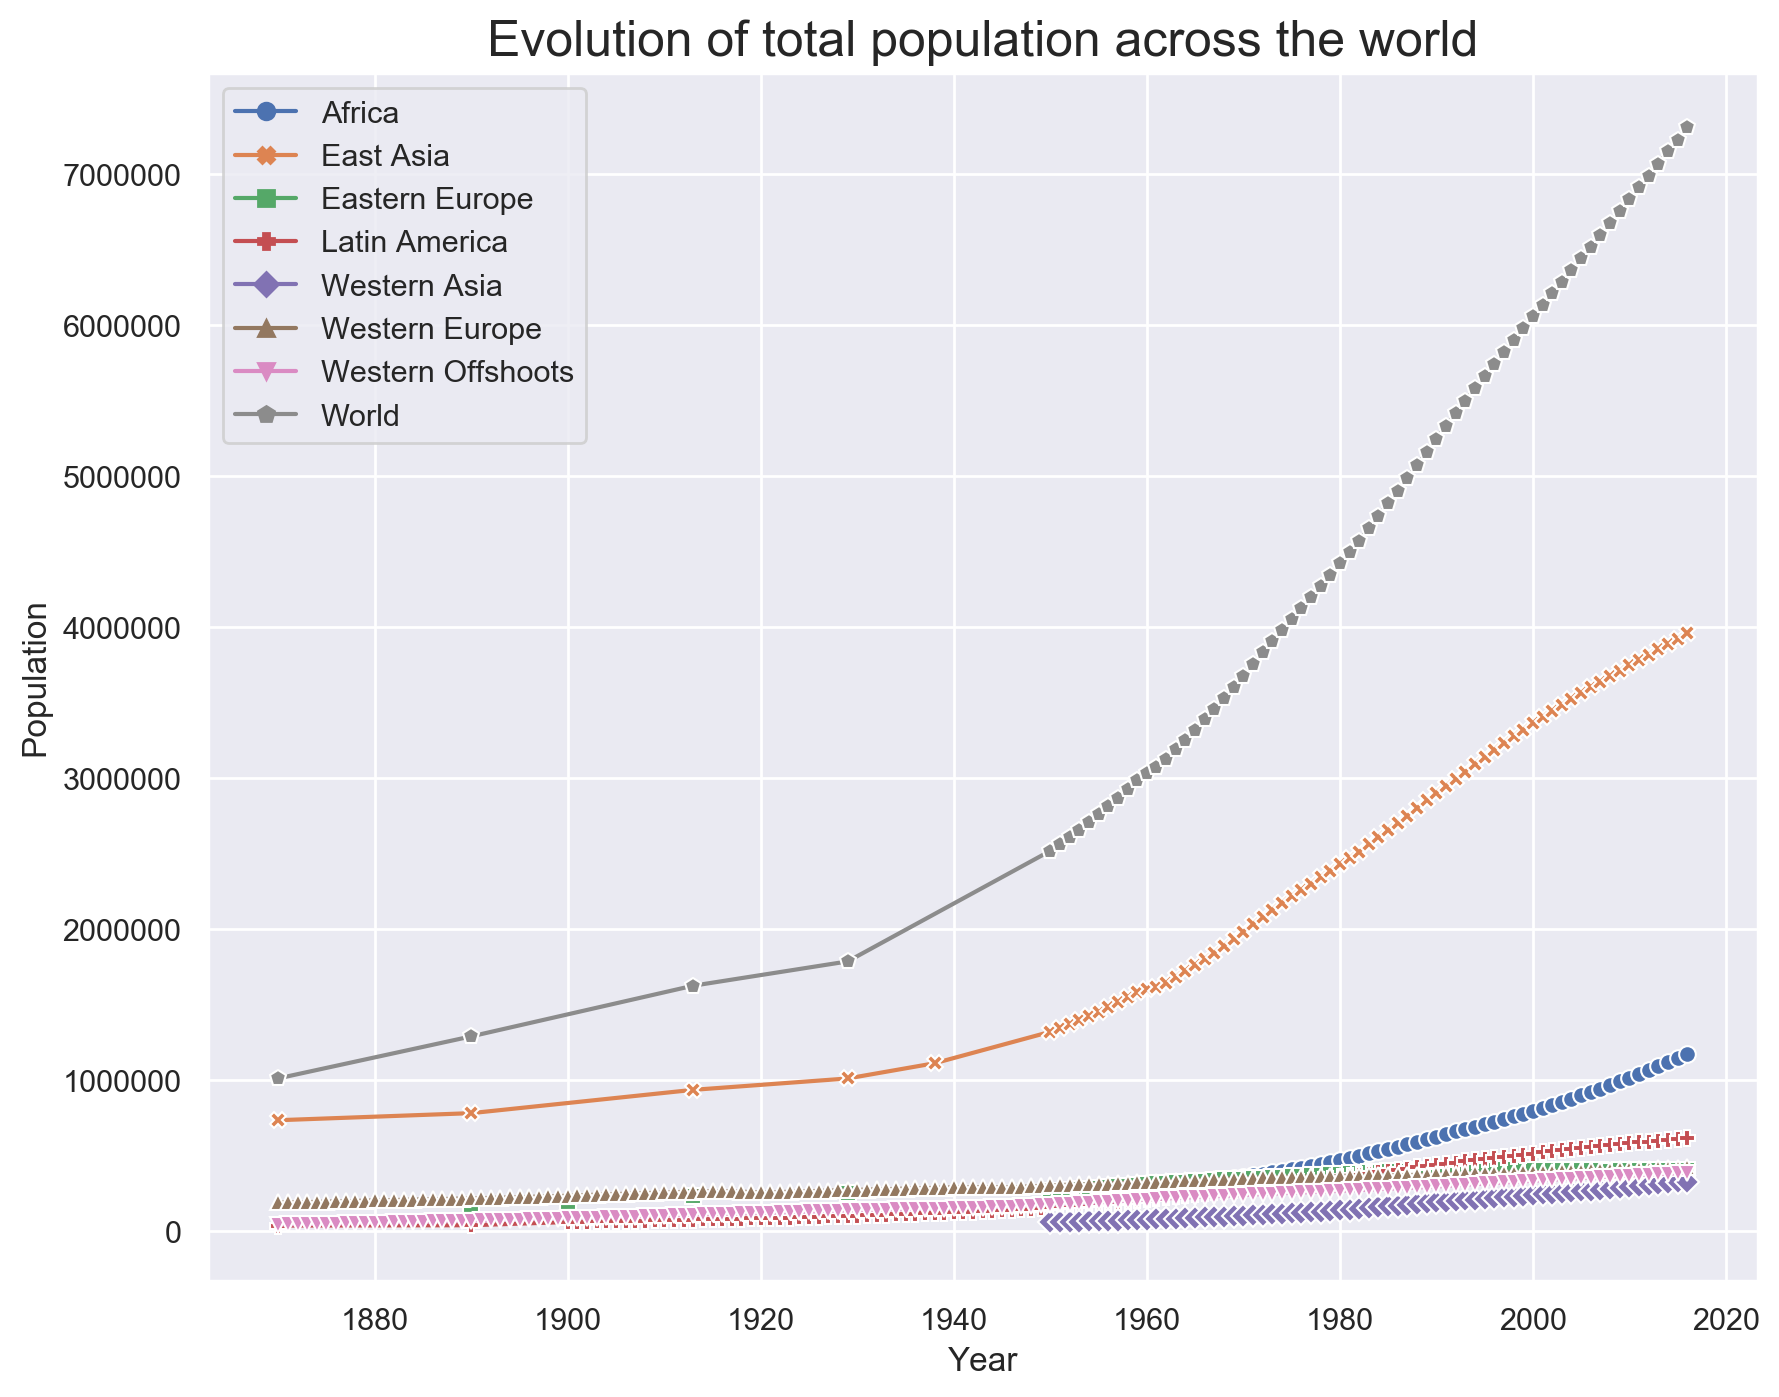

In [6]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popg , alpha=1, style='region', dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title("Evolution of total population across the world", fontsize=18)

# 2. Plots the evolution of the share of the world population by countries and WB regions.

In [7]:
import requests
import pandas as pd
import pandas_datareader as web


session = requests.Session()
session.verify = False

ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [ ]:
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    import urllib3,certifi
https = urllib3.PoolManager( cert_reqs='CERT_REQUIRED',
 ca_certs=certifi.where(),)  

from time import sleep
from pandas_datareader import data, wb
import wbpy 
from pprint import pprint

In [ ]:
import world_bank_data as wb
pd.set_option('display.max_rows', 6)

In [ ]:
wbcountries = wb.get_countries()
wbcountries['name'] = wbcountries.name.str.strip()
wbcountries

In [ ]:
wbcountries.reset_index(level=0, inplace=True)

In [ ]:
wbcountries.rename(columns={'id':'countrycode'}, inplace=True)
wbcountries

In [ ]:
popcountry=maddison_new.merge(popworld, on='year')

In [ ]:
popcountry['share']=(popcountry['pop']/popcountry['World'])*100
popcountry

In [ ]:
popcountry2 = popcountry.pivot_table(index='year',columns='country',values='share',aggfunc='sum')

In [ ]:
popregion = popcountry[['countrycode', 'country', 'year', 'pop',
                        'World']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])

In [ ]:
popregion['share']=(popregion['pop']/popregion['World'])*100

In [ ]:
popregion2 = popregion.pivot_table(index='year',columns='region',values='share',aggfunc='sum')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=popregion2 , alpha=1, style='country', dashes=False, markers=True)
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title("Share of world population by region", fontsize=17)

# 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [ ]:
world2= wb.get_series('SP.DYN.CDRT.IN',id_or_value='id', simplify_index=True)
world2 = world2.to_frame()
world2=world2.reset_index()
world2 = world2.drop(['Year','Country'],axis=1)

In [ ]:
world1= wb.get_series('SP.DYN.TFRT.IN',id_or_value='id', simplify_index=True)

world1 = world1.to_frame()
world1=world1.reset_index()

In [ ]:
world3= wb.get_series('SP.DYN.LE00.IN',id_or_value='id', simplify_index=True)
world3 = world3.to_frame()
world3=world3.reset_index()
world3 = world3.drop(['Year','Country'],axis=1)

In [ ]:
world1['SP.DYN.LE00.IN'] = world3
world1['SP.DYN.CDRT.IN'] = world2

In [ ]:
world1['Year']=pd.to_numeric(world1.Year)
world1 = world1

In [ ]:
world1.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
world1.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
world1.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)

In [ ]:
worldP = world1.loc[world1.Country=='WLD']
worldA = worldP.loc[worldP.Year!=2019]
worldA

In [ ]:
worldA = worldA.pivot_table(index='Year',columns='Country',aggfunc='sum')

In [ ]:
worldA.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldA.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldA.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldA

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=worldA , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['Mortality','Life expectancy','Fertility'])
ax.set_xlabel('Year')
ax.set_ylabel('Index (Years)')
ax.set_title("Fertility, Mortality and Life expectancy")

# 4. Downloads mortality and life expectancy data (across regions and cohorts) from the [Human Mortality Database] and plot

In [ ]:
mortality = pd.read_csv(pathout + 'stmf.csv')
mortality

In [ ]:
mortality = mortality.reset_index()
new_header = mortality.iloc[0] 
mortality.columns = new_header 

mortality

In [ ]:

mortalityb=mortality.loc[mortality.Sex=='b']
mortalitym=mortality.loc[mortality.Sex=='m']
mortalityf=mortality.loc[mortality.Sex=='f']

In [ ]:
graphb = mortalityb[['Year','RTotal']]
graphb = graphb.apply(pd.to_numeric)

graphm = mortalitym[['Year','RTotal']]
graphm = graphm.apply(pd.to_numeric)

graphf = mortalityf[['Year','RTotal']]
graphf = graphf.apply(pd.to_numeric)
graphf

In [ ]:
meanb =graphb.groupby(['Year']).mean()
meanf =graphf.groupby(['Year']).mean()
meanm =graphm.groupby(['Year']).mean()

In [ ]:
meanb.rename(columns={'RTotal':'Both'}, inplace=True)
meanf.rename(columns={'RTotal':'Female'}, inplace=True)
meanm.rename(columns={'RTotal':'Male'}, inplace=True)

In [ ]:

TOT=meanb.merge(meanm, on='Year')
TOT=TOT.merge(meanf, on = 'Year')
TOT

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
plt.plot(TOT, linewidth=3)

plt.title('Death rate - world')
plt.legend(['Both','Male','Female'])

plt.xlabel('Year')
plt.ylabel('Death rate')



plt.show()

In [ ]:
mortality.rename(columns={'CountryCode':'countrycode'}, inplace=True)
mortality

In [ ]:
mortalitycohort = mortality[['countrycode', 'Year','Sex', 'R0_14', 'R15_64', 'R65_74', 'R75_84'
                             , 'R85p']].merge(wbcountries[['countrycode', 'region']], on=['countrycode'])
mortalitycohort

In [ ]:
mortalitycohort2 = mortalitycohort.loc[mortalitycohort.Sex=='b']
mortalitycohort2

In [ ]:
###usa
mortaily_region1= mortalitycohort2.loc[mortalitycohort2.region=='North America']
mortaily_region1 =mortaily_region1.drop(columns=['countrycode','region','Sex']) 
mortaily_region1

In [ ]:
mortaily_region1 = mortaily_region1.pivot_table(index='Year', aggfunc='sum')
mortaily_region1

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_region1 , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - North America")

In [ ]:
mortaily_easia = mortalitycohort2.loc[mortalitycohort2.region=='Europe & Central Asia']
mortaily_easia =mortaily_easia.drop(columns=['countrycode','region','Sex']) 
mortaily_easia = mortaily_easia.apply(pd.to_numeric)
mortaily_easia

In [ ]:
mortaily_easia = mortaily_easia.pivot_table(index='Year', aggfunc='sum')
mortaily_easia

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.lineplot(data=mortaily_easia , alpha=1, style='country', dashes=False, markers=True)
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
plt.legend(['0 - 14','15 - 64','65 - 74','75 - 84', '85 or more'])
ax.set_xlabel('Year')
ax.set_ylabel('Years')
ax.set_title("Mortality rate - Europe and Asia")

##  5. Using this data analyze the convergence of life expectanty, mortality and fertility

In [ ]:
worldp = world1
worldp.rename(columns={'SP.DYN.TFRT.IN':'fertility'}, inplace=True)
worldp.rename(columns={'SP.DYN.CDRT.IN':'mortality'}, inplace=True)
worldp.rename(columns={'SP.DYN.LE00.IN':'lifeex'}, inplace=True)
worldp

In [ ]:
meanW =worldp.groupby(['Year']).mean()
MEAN = meanW
MEAN.reset_index(level=0, inplace=True)
MEAN

In [ ]:
mean1960 = meanW.drop(meanW[meanW.Year != 1960].index)

In [ ]:
mean1960.set_index('Year', inplace=True)
mean1960

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1960 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1960")

In [ ]:
mean1970 = meanW.drop(meanW[meanW.Year != 1970].index)
mean1980 = meanW.drop(meanW[meanW.Year != 1980].index)
mean1990 = meanW.drop(meanW[meanW.Year != 1990].index)
mean2000 = meanW.drop(meanW[meanW.Year != 2000].index)
mean2010 = meanW.drop(meanW[meanW.Year != 2010].index)
mean2018 = meanW.drop(meanW[meanW.Year != 2018].index)

In [ ]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean1990 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')
ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 1990")

In [ ]:
fig, ax = plt.subplots(figsize=(10,8),dpi=200)
sns.barplot(data=mean2018 , alpha=1,palette="ch:2.5,.25")
plt.style.use('tableau-colorblind10')

ax.tick_params(axis = 'both', which = 'major')
ax.tick_params(axis = 'both', which = 'minor')
ax.set_xlabel('Index')
ax.set_ylabel('Value')
ax.set_title("Fertility, Mortality and Life expectative - 2018")

In [ ]:
mean1970.set_index('Year', inplace=True)
mean1980.set_index('Year', inplace=True)
mean1990.set_index('Year', inplace=True)
mean2000.set_index('Year', inplace=True)
mean2010.set_index('Year', inplace=True)
mean2018.set_index('Year', inplace=True)

In [ ]:
mean2000

In [ ]:
frames = [mean1960,mean1970,mean1980,mean1990,mean2000,mean2010,mean2018]

result = pd.concat(frames)
result

In [ ]:

fig, ax = plt.subplots(figsize=(10,8),dpi=200)

sns.lineplot(data=result , alpha=1, style='choice',palette="ch:9.5,.25", dashes=False, markers=True)

ax.set_xlabel('Year')
ax.set_ylabel('Index Value')
ax.set_title("Fertility, Mortality and Life expectative")